# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Get keys from my file
from api_keys import weather_api_key
from api_keys import g_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Set Output File (CSV) path
#
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations and zip into a list of tuples
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the Citypy package to return a unique city and country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries)

# Print the city count to confirm sufficient count ( Greater than 500 )
print(len(cities))


607


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : pitea
Processing Record 2 of Set 1 : port-gentil
Processing Record 3 of Set 1 : nome
Processing Record 4 of Set 1 : pacific grove
Processing Record 5 of Set 1 : xiongzhou
Processing Record 6 of Set 1 : puerto ayora
Processing Record 7 of Set 1 : victoria
Processing Record 8 of Set 1 : mayo
Processing Record 9 of Set 1 : ancud
Processing Record 10 of Set 1 : sambava
Processing Record 11 of Set 1 : penco
Processing Record 12 of Set 1 : plettenberg bay
Processing Record 13 of Set 1 : tautira
City not found. Skipping...
Processing Record 14 of Set 1 : hailar
Processing Record 15 of Set 1 : cabo san lucas
Processing Record 16 of Set 1 : hithadhoo
Processing Record 17 of Set 1 : namibe
Processing Record 18 of Set 1 : adrar
Processing Record 19 of Set 1 : tynda
Processing Record 20 of Set 1 : kapaa
Processing Record 21 of Set 1 : kidal
Processing Record 22 of Set 1 : jamestown
Processing Record 23 of Set 1 

Processing Record 36 of Set 4 : black river
Processing Record 37 of Set 4 : qaanaaq
City not found. Skipping...
Processing Record 38 of Set 4 : troitskoye
Processing Record 39 of Set 4 : dauphin
Processing Record 40 of Set 4 : golubitskaya
Processing Record 41 of Set 4 : ahipara
Processing Record 42 of Set 4 : torbay
Processing Record 43 of Set 4 : ca mau
Processing Record 44 of Set 4 : alcains
Processing Record 45 of Set 4 : bedesa
Processing Record 46 of Set 4 : saint-georges
Processing Record 47 of Set 4 : kavieng
Processing Record 48 of Set 4 : oriximina
Processing Record 49 of Set 4 : iquique
Processing Record 50 of Set 4 : isangel
Processing Record 0 of Set 5 : baie-saint-paul
Processing Record 1 of Set 5 : hasaki
Processing Record 2 of Set 5 : travagliato
Processing Record 3 of Set 5 : nicoya
Processing Record 4 of Set 5 : molln
City not found. Skipping...
Processing Record 5 of Set 5 : padang
Processing Record 6 of Set 5 : esperance
Processing Record 7 of Set 5 : nuevo vigia
Pr

Processing Record 23 of Set 8 : avera
City not found. Skipping...
City not found. Skipping...
Processing Record 24 of Set 8 : yenagoa
Processing Record 25 of Set 8 : noumea
Processing Record 26 of Set 8 : khorramabad
Processing Record 27 of Set 8 : bembereke
Processing Record 28 of Set 8 : elliot
Processing Record 29 of Set 8 : tanza
City not found. Skipping...
Processing Record 30 of Set 8 : toora-khem
Processing Record 31 of Set 8 : aquiraz
Processing Record 32 of Set 8 : plouzane
City not found. Skipping...
Processing Record 33 of Set 8 : nobres
Processing Record 34 of Set 8 : russell
City not found. Skipping...
Processing Record 35 of Set 8 : kosh-agach
Processing Record 36 of Set 8 : las vegas
Processing Record 37 of Set 8 : bucerias
Processing Record 38 of Set 8 : constitucion
Processing Record 39 of Set 8 : mandurah
Processing Record 40 of Set 8 : lorengau
Processing Record 41 of Set 8 : sao sebastiao
Processing Record 42 of Set 8 : olden
Processing Record 43 of Set 8 : port mor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Covert Raw data to DataFrame() and store to "weather_dict" as the the following 
# format
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list                
})


# Display the Data Frame
weather_dict.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Piteå,65.32,21.48,51.80,100,92,5.82,SE,1601506948
1,Port-Gentil,-0.72,8.78,77.00,83,20,6.93,GA,1601506421
2,Nome,64.50,-165.41,48.99,57,1,25.28,US,1601506558
3,Pacific Grove,36.62,-121.92,86.00,62,1,6.93,US,1601506949
4,Xiongzhou,25.12,114.30,70.54,85,72,1.92,CN,1601506949


In [6]:
# Save city data into a csv file for further analysis and plotting
#
weather_dict.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check if there is any city that have humidity > 100%
#
weather_dict.loc[weather_dict["Humidity"] > 100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_dict_index = weather_dict.index[weather_dict["Humidity"] > 100]
weather_dict_index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#
weather_dict = weather_dict.drop(weather_dict_index)
weather_dict.dropna(inplace = True) 
weather_dict.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Piteå,65.32,21.48,51.80,100,92,5.82,SE,1601506948
1,Port-Gentil,-0.72,8.78,77.00,83,20,6.93,GA,1601506421
2,Nome,64.50,-165.41,48.99,57,1,25.28,US,1601506558
3,Pacific Grove,36.62,-121.92,86.00,62,1,6.93,US,1601506949
4,Xiongzhou,25.12,114.30,70.54,85,72,1.92,CN,1601506949
5,Puerto Ayora,-0.74,-90.35,66.99,91,86,8.01,EC,1601506950
6,Hong Kong,22.29,114.16,79.00,80,99,1.01,HK,1601506950
7,Mayo,38.89,-76.51,66.20,59,1,6.93,US,1601506950
8,Ancud,-41.87,-73.82,48.00,81,75,4.70,CL,1601506951
9,Sambava,-14.27,50.17,72.28,92,57,4.72,MG,1601506951


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

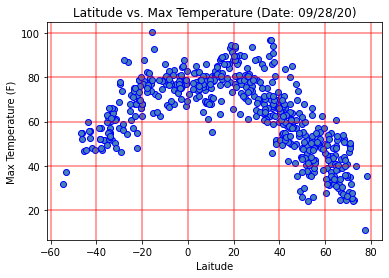

In [10]:
# Create scatter plot: Latitude vs. Temperature 
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], 
            facecolor = "steelblue", edgecolor = "blue")

# Title 
plt.title("Latitude vs. Max Temperature (Date: 09/28/20)")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Max Temperature (F)")

# set grid line
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the plotted figures as .pngs
#
plt.savefig("../Images/Latitude-vs-MaxTemperature.png")


## Latitude vs. Humidity Plot

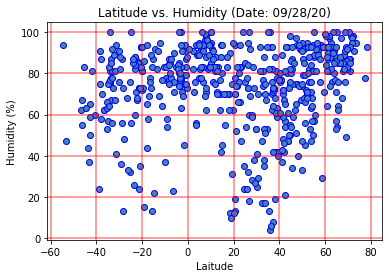

In [11]:
# Create scatter plot: Latitude vs. Humidity Plot
#
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], 
            facecolor = "steelblue", edgecolor = "blue")

# Title
plt.title("Latitude vs. Humidity (Date: 09/28/20)")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Humidity (%)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the plotted figure as .pngs
plt.savefig("../Images/City-Latitude-vs-Humidity.png")


## Latitude vs. Cloudiness Plot

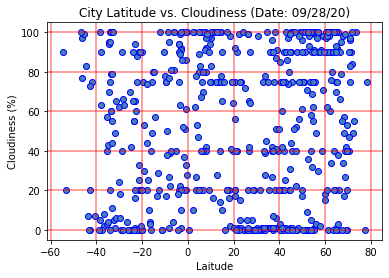

In [12]:
# Create scatter plot: Latitude vs. Cloudiness 
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], 
            facecolor = "steelblue", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Cloudiness (Date: 09/28/20)")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the plotted figure as .pngs
plt.savefig("../Images/Latitude-vs-Cloudiness.png")


## Latitude vs. Wind Speed Plot

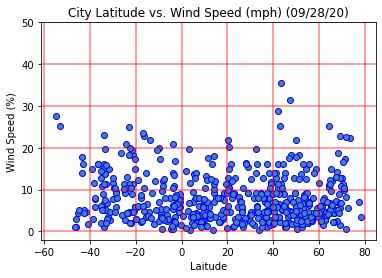

In [13]:
# Create scatter plot: Latitude vs. Wind Speed 
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], 
            facecolor = "steelblue", edgecolor = "blue")
plt.title("City Latitude vs. Wind Speed (mph) (09/28/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')


# Save the plotted figure as .pngs
plt.savefig("../Images/Latitude-vs-WindSpeed(mph.png")


## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]


In [15]:
# Function to creating linear regression and scatter plot
# Linear regression func
#
def linear_regress(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Fuction for annotating plot
#
def annotate_plt(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.82


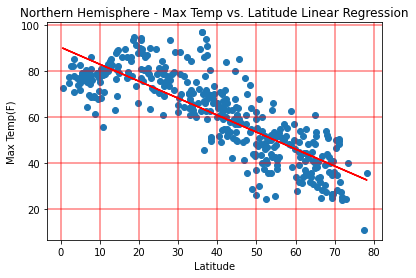

In [16]:
# Call function 
get_regress = linear_regress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call annotation func
#
annotate_plt(get_regress, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp(F)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/NorthernHemisphere-MaxTemp-vs-LatitudeLinearRegression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.77


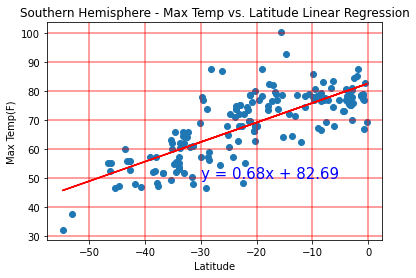

In [17]:
# Call function 
get_regress = linear_regress(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call annotate func
annotate_plt(get_regress, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp(F)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/SouthernHemisphere-MaxTemp-vs-Latitude-LinearRegression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.13


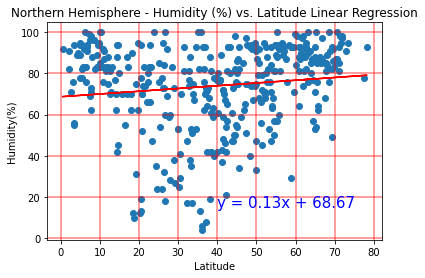

In [18]:
# Call function 
get_regress = linear_regress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call annotate func
annotate_plt(get_regress, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity(%)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/Northern Hemisphere-Humidity(%)-vs-Latitude-Linear-Regression.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.22


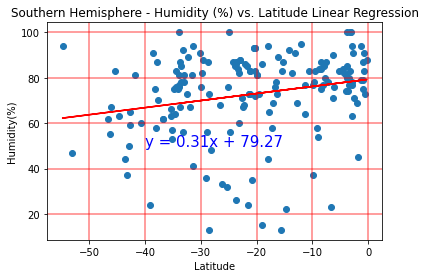

In [19]:
# Call function 
get_regress = linear_regress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call annotate func
annotate_plt(get_regress, -40, 50)

# Title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Humidity(%)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/SouthernHemisphere-Humidity(%)-vs-LatitudeLinearRegression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.02


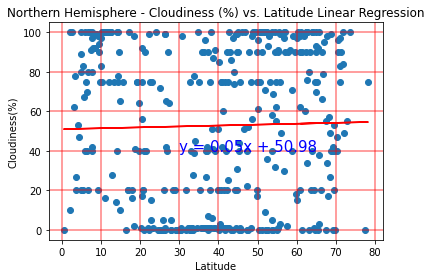

In [20]:
# Call function 
get_regress = linear_regress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call annotate func
annotate_plt(get_regress, 30, 40)

# Title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Cloudiness(%)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


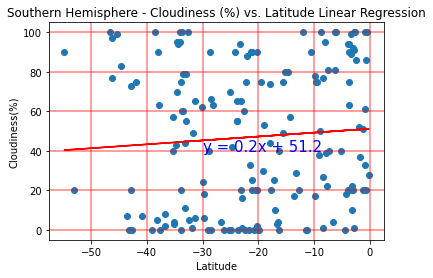

In [21]:
# Call function 
get_regress = linear_regress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call annotate func
annotate_plt(get_regress, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Cloudiness(%)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07


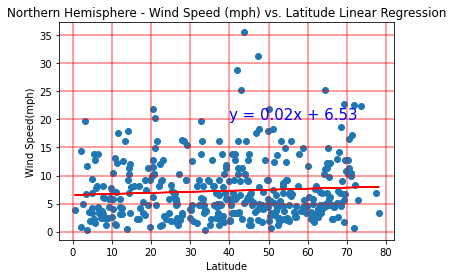

In [22]:
# Call function 
get_regress = linear_regress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call annotate func
annotate_plt(get_regress, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed(mph)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/Northern Hemisphere-WindSpeed-vs-Latitude-Linear-Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.19


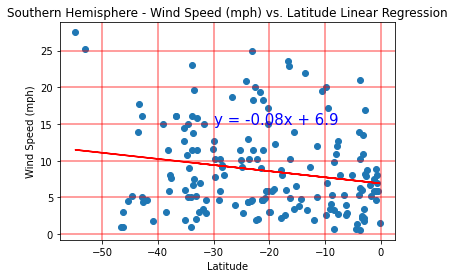

In [23]:
# Call function 
get_regress = linear_regress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call annotate func
annotate_plt(get_regress, -30, 15)

# title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Wind Speed (mph)")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
